In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
sns.set()

ImportError: DLL load failed while importing qhull: The specified module could not be found.

In [2]:
df = pd.read_csv('Hotel-A-train.csv')
df.head(5)

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,...,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,...,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119
3,67301739,M,25,African American,College,>100K,South,Airport Hotels,7/2/2015,7/3/2015,...,BB,No,No,Refundable,Agent,Yes,Check-In,Yes,5,144
4,77222321,F,62,Latino,High-School,25K --50K,East,Resort,7/3/2015,7/4/2015,...,BB,No,No,No Deposit,Direct,No,Check-In,Yes,10,242


In [3]:
#Basic statistics
df.describe()

#Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27499 entries, 0 to 27498
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Reservation-id          27499 non-null  int64 
 1   Gender                  27499 non-null  object
 2   Age                     27499 non-null  int64 
 3   Ethnicity               27499 non-null  object
 4   Educational_Level       27499 non-null  object
 5   Income                  27499 non-null  object
 6   Country_region          27499 non-null  object
 7   Hotel_Type              27499 non-null  object
 8   Expected_checkin        27499 non-null  object
 9   Expected_checkout       27499 non-null  object
 10  Booking_date            27499 non-null  object
 11  Adults                  27499 non-null  int64 
 12  Children                27499 non-null  int64 
 13  Babies                  27499 non-null  int64 
 14  Meal_Type               27499 non-null  object
 15  Vi

In [5]:
#List of categorical variables
cat_list = []

#List of continuious variables
cont_list = []

In [8]:
#Convert Dates to continuous variables
def date_to_num(d):
    d = d.split('/')
    d = list(map(int, d))
    month, day, year = d
    ref_date = date(2015,1,1)
    cur_date = date(year,month,day)
    delta = cur_date - ref_date
    return delta.days

df['in_day'] = df['Expected_checkin'].map(lambda d: date_to_num(d))
df['out_day'] = df['Expected_checkout'].map(lambda d: date_to_num(d))
df['duration'] = df['out_day'] - df['in_day']



In [11]:
def date_to_month(d):
    d = d.split('/')
    d = list(map(int, d))
    month, day, year = d
    return month

df['in_month'] = df['Expected_checkin'].map(lambda d: date_to_month(d))
df['out_month'] = df['Expected_checkout'].map(lambda d: date_to_month(d))

In [9]:
#Generate a report of the data
prof = ProfileReport(df)
prof.to_file(output_file='report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  8.82it/s]


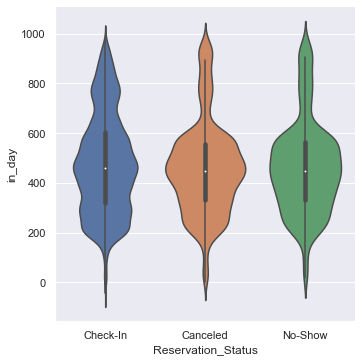

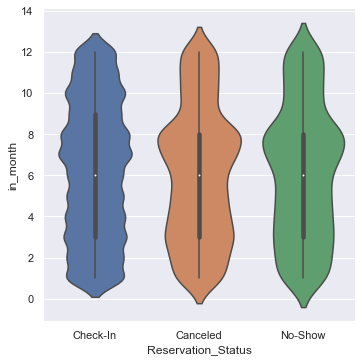

In [18]:
#Begin plotting to visualize the data
sns.catplot(x='Reservation_Status', y='in_day', kind='violin', data=df)
sns.catplot(x='Reservation_Status', y='in_month', kind='violin', data=df)


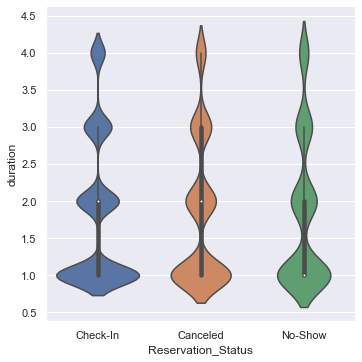

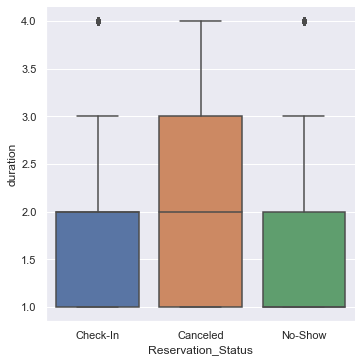

In [19]:
sns.catplot(x='Reservation_Status', y='duration', kind='violin', data=df)
sns.catplot(x='Reservation_Status', y='duration', kind='box', data=df)

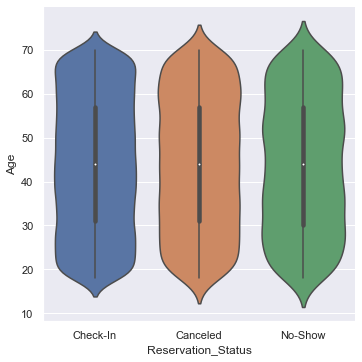

In [35]:
sns.catplot(x='Reservation_Status', y='Age', kind='violin', data=df)

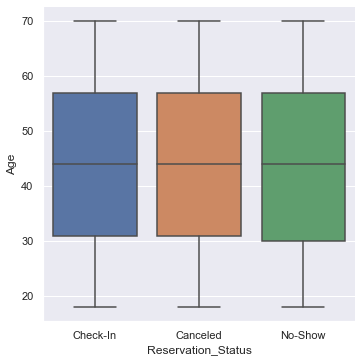

In [36]:
sns.catplot(x='Reservation_Status', y='Age', kind='box', data=df)

<AxesSubplot:xlabel='Reservation_Status', ylabel='count'>

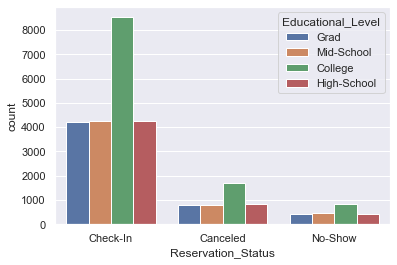

In [34]:

sns.countplot(x="Reservation_Status",hue="Educational_Level", data=df)

In [39]:
mmap = df.pivot(index='Deposit_type', columns = 'Adults', values='Reservation_Status')
sns.heatmap(mmap)

ValueError: Index contains duplicate entries, cannot reshape